## EDA and Data preprocessing

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#this is the path to the dataset in local system
path = "/Users/syedfaquaruddinquadri/Documents/Applied ML and DM/Final Project/archive"

###  Exploring Business data

In [4]:
#converting business csv into dataframe
df = pd.read_csv(path+"/business_data.csv")

In [5]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [6]:
df.shape

(150346, 14)

In [7]:
df.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


Note: Categories have some null values we need to remove that

In [9]:
# finding out the unique business
lst = df.categories.unique()


Note: We only need restaurants for this project so we gonna fill the na values and fiter out the restaurants from the dataset

In [18]:
# subsetting only the restaurants from whole dataset and filling the na values by "-"
rest_business = df[df.categories.fillna('NaN').str.lower().str.contains('restaurant')]

In [19]:
rest_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


In [20]:
rest_business.shape

(52286, 14)

Note: The rows reduced from 150346 to 52286. This contains only the business (restaurants)

In [13]:
rest_business.isnull().sum()

business_id        0
name               0
address          443
city               0
state              0
postal_code       21
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       566
categories         0
hours           7279
dtype: int64

There are some null values in the address, postal_code, attributes, hours. I dont think this are very concerning to our analysis for this project, if its gonna effect our analysis we gonna deal with it later.

In [14]:
#checking the number of restaurants are open
rest_business.is_open.value_counts()

1    35004
0    17282
Name: is_open, dtype: int64

In [ ]:
# checking the unique categories
business_cat = 

In [15]:
#cities with most restaurants
rest_business.city.value_counts()

Philadelphia      5854
Tampa             2961
Indianapolis      2862
Nashville         2503
Tucson            2470
                  ... 
Woolwich Twp.        1
Quinton              1
Philadephia          1
tucson               1
UPPER MORELAND       1
Name: city, Length: 920, dtype: int64

In [16]:
#checking the number of cities
len(rest_business.city.value_counts())

920

Note: From this we can say that philadelphia has most number of restaurants and the number of cities in the dataset are 920. however the number of cities is not correct as there are some misspled words like "Philadelphia" and "Philadephia" which i think is the same city. We need to find a way to correct that.


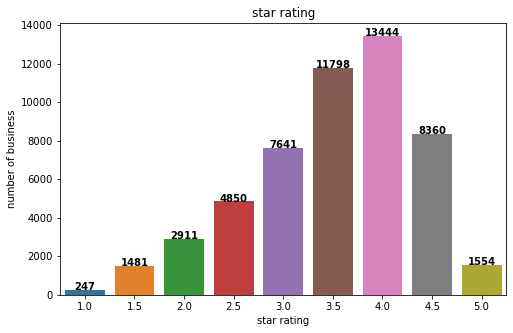

In [52]:
# Visualizing star rating

plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'stars', data = rest_business)
plt.title('star rating')
plt.ylabel('number of business')
plt.xlabel('star rating')

for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.text(x+width-.4, 
                y+height,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center') 
                


In the last group meeting we decided to focus on a specific city rather than all the cities in the dataset to build a recommendation system on. analyzing which city to focus

In [75]:
rest_business.state.value_counts().index

# we gonna take top 15 states as the other states are negligible

Index(['PA', 'FL', 'TN', 'MO', 'IN', 'LA', 'NJ', 'AZ', 'AB', 'NV', 'ID', 'CA',
       'IL', 'DE', 'NC', 'CO', 'HI', 'MT', 'XMS'],
      dtype='object')

/Users/syedfaquaruddinquadri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


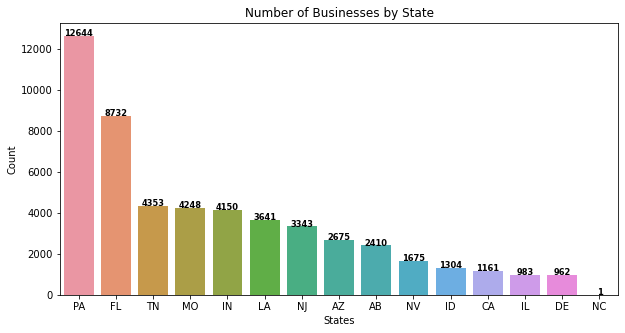

In [80]:
plt.figure(figsize=(10,5))

x = rest_business.state.value_counts().index[:15]
y = rest_business.state.value_counts().values[:15]

ax = sns.barplot(x, y)
ax.set_ylabel('Count')
ax.set_xlabel('States')
ax.set_title('Number of Businesses by State')

for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.text(x+width-.4, 
                y+height+2,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center',
               size='small') 


As we can see that PA state has most number of restaurants now lets see which city in PA has most restaurants

In [86]:
rest_business_PA = rest_business[rest_business['state'] == 'PA']

In [88]:
rest_business_PA.sample(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8193,MnCs5pIA0BF3FN7T6wTNyg,O blue café,400 Fairmount Ave,Philadelphia,PA,19123,39.962573,-75.144756,5.0,11,0,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, Cafes","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
26141,RIKQTbjFnvHkE78L7aVyCA,Pizza Palace,602 W Lancaster Ave,Bryn Mawr,PA,19010,40.018045,-75.311421,3.5,9,0,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Pizza, Restaurants",NaN
52802,4eZ-elvoXx4m65uoz7ymzQ,Nina's Waffles & Ice Cream,110 S Main St,New Hope,PA,18938,40.360884,-74.949898,4.5,149,1,"{'WiFi': ""u'no'"", 'BusinessParking': ""{'garage...","Waffles, Food Trucks, Food, Restaurants, Desse...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-21:0', ..."
105882,g2bYK-Z3foqSnCiOPYtdsA,Wawa,870 Second Street Pike,Richboro,PA,18954,40.210828,-75.012079,2.5,9,1,"{'BusinessParking': ""{'garage': False, 'street...","Gas Stations, Food, Automotive, Restaurants, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
5874,F1hbIYD1lNzbprtckd7bVg,Venuto's Old World Pizza,6024 Ridge Ave,Philadelphia,PA,19128,40.032207,-75.214255,3.0,5,0,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Pizza, Restaurants, Italian",NaN


/Users/syedfaquaruddinquadri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


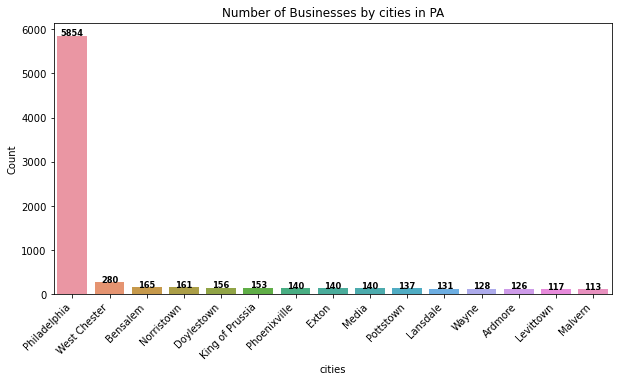

In [90]:
plt.figure(figsize=(10,5))

x = rest_business_PA.city.value_counts().index[:15]
y = rest_business_PA.city.value_counts().values[:15]

ax = sns.barplot(x, y)
ax.set_ylabel('Count')
ax.set_xlabel('cities')
ax.set_title('Number of Businesses by cities in PA')
plt.xticks(rotation=45, ha='right')

for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.text(x+width-.4, 
                y+height+2,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center',
               size='small') 

Philadelphia has the most number of restaurants lets also check for the florida state as this has the 2nd most restaurants

In [92]:
rest_business_FL = rest_business[rest_business['state'] == 'FL']

/Users/syedfaquaruddinquadri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


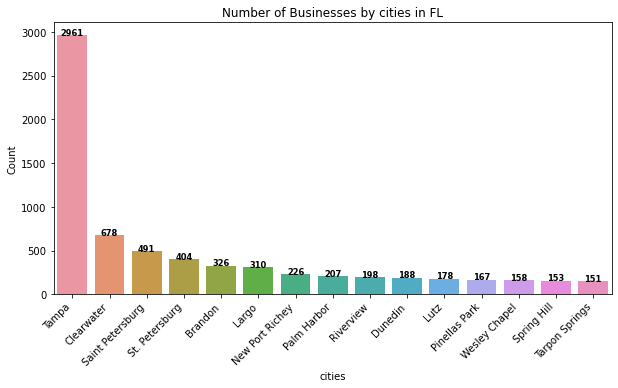

In [93]:
plt.figure(figsize=(10,5))

x = rest_business_FL.city.value_counts().index[:15]
y = rest_business_FL.city.value_counts().values[:15]

ax = sns.barplot(x, y)
ax.set_ylabel('Count')
ax.set_xlabel('cities')
ax.set_title('Number of Businesses by cities in FL')
plt.xticks(rotation=45, ha='right')

for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.text(x+width-.4, 
                y+height+2,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center',
               size='small') 

/Users/syedfaquaruddinquadri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


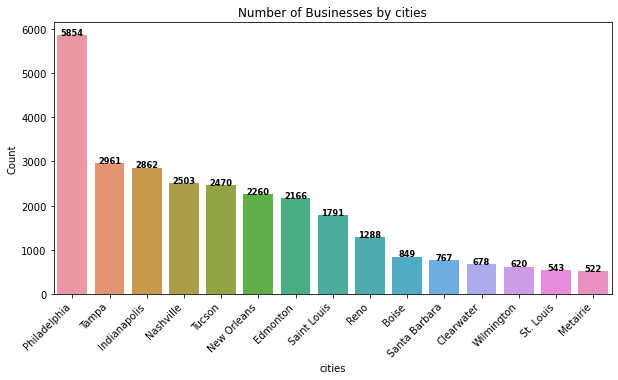

In [94]:
plt.figure(figsize=(10,5))

x = rest_business.city.value_counts().index[:15]
y = rest_business.city.value_counts().values[:15]

ax = sns.barplot(x, y)
ax.set_ylabel('Count')
ax.set_xlabel('cities')
ax.set_title('Number of Businesses by cities')
plt.xticks(rotation=45, ha='right')

for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.text(x+width-.4, 
                y+height+2,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center',
               size='small') 

### Exploring User data

In [101]:
df1 = pd.read_csv(path+"/user_data.csv")

In [102]:
df1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,w2YtDNW6ebYx43foyvpYxw,00SWKuMcScsA5hZ7tzvm1w,2Y-cy25mig7WM955KOcqMQ,2,0,0,0,I just went in today for a regular gel on both...,2021-05-28 23:16:56
1,bRMOsHgqngHzyUND_Sr-dw,v8pkGYudWGGiSDfF1dyTWg,kD03gNnQrHarCz97s1BNDQ,5,0,0,0,Excellent casual dining in a boisterous and li...,2021-10-17 14:52:46
2,iqKvsxnMNxp4HqUUACDGvg,P3IkXK8yza4jzx04n08ZsA,jhckIMBzOldxgS66DrV8zA,2,0,0,0,"TLDR; the food was fantastic, our waiter was k...",2017-04-08 19:30:13
3,-G41sH2iStHbU1b2mpudEQ,CxkmHx-96t9jmLJLUvSDqQ,YwrL69clJBmO9-HgA7dfUA,3,2,0,0,My wife and I stopped in for dinner while the ...,2018-09-20 22:00:08
4,KLkCCUEPDFSYCt4fk1wIHA,04LPjOC5z5Zgel8CAhm9xA,-1K1J_D9eT2dR6BNvQ2Tnw,1,1,0,0,Didn't even bother getting my car washed here ...,2017-07-07 20:29:50


We dont need useful, funny, cool features for this project so we gonna drop this features

In [103]:
users_df = df1.drop(['useful', 'funny', 'cool'], axis = 1)

In [104]:
users_df.head()

,review_id,user_id,business_id,stars,text,date
0,w2YtDNW6ebYx43foyvpYxw,00SWKuMcScsA5hZ7tzvm1w,2Y-cy25mig7WM955KOcqMQ,2,I just went in today for a regular gel on both...,2021-05-28 23:16:56
1,bRMOsHgqngHzyUND_Sr-dw,v8pkGYudWGGiSDfF1dyTWg,kD03gNnQrHarCz97s1BNDQ,5,Excellent casual dining in a boisterous and li...,2021-10-17 14:52:46
2,iqKvsxnMNxp4HqUUACDGvg,P3IkXK8yza4jzx04n08ZsA,jhckIMBzOldxgS66DrV8zA,2,"TLDR; the food was fantastic, our waiter was k...",2017-04-08 19:30:13
3,-G41sH2iStHbU1b2mpudEQ,CxkmHx-96t9jmLJLUvSDqQ,YwrL69clJBmO9-HgA7dfUA,3,My wife and I stopped in for dinner while the ...,2018-09-20 22:00:08
4,KLkCCUEPDFSYCt4fk1wIHA,04LPjOC5z5Zgel8CAhm9xA,-1K1J_D9eT2dR6BNvQ2Tnw,1,Didn't even bother getting my car washed here ...,2017-07-07 20:29:50


In [107]:
users_df.text[0]

"I just went in today for a regular gel on both toes and finger nails. Both toes and nails were done by two different women. Nail tech who did my toes did a great job. On the other hand, the tech who did my finger nails did not push back my cuticles or trim them as they should. She also kept using the same dip of gel coat for three nails which was lame as hell to me. And when the lady who did my toes came to take a look at them, the tech who did my finger nails walked my with an attitude written all over her face. I tipped well today. I'm just going to leave it at that.... thanks to the one who did my toes tho. You were awesome."

this user data contains all the users on the yelp data set we only need for the restaurants

In [108]:
users_df.shape

(1611200, 6)

In [125]:
rest_users_df = pd.merge(rest_business, users_df, on = 'business_id')

In [126]:
rest_users_df.shape

(975800, 32)

In [127]:
# checking the random review of the user to validate that this only contains about restaurants 
rest_users_df.text[100]

'Stupid expensive. Cute inside and outside. Very small. Server was friendly, but service was slow. Food was okay. The menu on the website is not the menu at the place. Totally disappointed. Cannot imagine returning after seeing those prices.'

### Exploring review data

In [128]:
# converting reviews csv file
df2 = pd.read_csv(path+'/reviews_data.csv')

In [129]:
#peeking into the datset
df2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990282 entries, 0 to 6990281
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       float64
 5   funny        float64
 6   cool         float64
 7   text         object 
 8   date         object 
dtypes: float64(4), object(5)
memory usage: 480.0+ MB


In [131]:
df2.shape

(6990282, 9)

In [132]:
df2.describe()

,stars,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06
mean,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01
std,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02


We dont need useful, funny, cool features in the dataset so I am dropping this features 